Trong phần này sẽ thay thế bóc tách từ tiếng việt từ underthesea thành Pyvi

In [1]:
!pip install pyvi

     |████████████████████████████████| 8.5 MB 4.4 MB/s 
     |████████████████████████████████| 743 kB 46.5 MB/s 


In [2]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pyvi import ViTokenizer
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pickle
import nltk
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [5]:
data = pd.read_excel('/content/Data1.xlsx')
X= data["question"]
Y= data["answer"]
print("thuoc tinh dieu kien")
print(X)
print("thuoc tinh can du doan")
print(Y)

thuoc tinh dieu kien
0                                            Tạm biệt bot
1                                                 Goodbye
2                                    Tạm biệt mày nhé bot
3                                           Chào tạm biệt
4                                Ngày mai gặp lại nhé bot
                              ...                        
1074              Khoa công nghệ thông có website là gì ?
1075    Khoa công nghệ thông tin trường đại học Công N...
1076    Khoa công nghệ thông tin có website trường là ...
1077    Website khoa công nghệ thông tin trường đại họ...
1078             Website khoa công nghệ thông tin là gì ?
Name: question, Length: 1079, dtype: object
thuoc tinh can du doan
0                            bye
1                            bye
2                            bye
3                            bye
4                            bye
                  ...           
1074    Website: fit.haui.edu.vn
1075    Website: fit.haui.edu.vn
1076    We

In [6]:
#Tiep theo chung ta se ma hoa Y sao cho no hop ly
le = preprocessing.LabelEncoder()
le.fit(Y)

list_label = list(le.classes_)

print(list_label)
print(len(list_label))

label = le.transform(Y)
print(label)

['Các hoạt động ngoại khóa: CLB tin học, CLB Tiếng Anh, CLB tình nguyện, CLB văn nghệ,….', 'Có 4 ngành: Công nghệ thông tin, Khoa học máy tính, Hệ thống thông tin, Kỹ Thuật phần mềm', 'Có nhiều phòng thực hành với máy cấu hình cao đáp ứng đầy đủ yêu cầu học tập cho các học phần.', 'Có đầy đủ kiến thức và kỹ năng có thể đáp ứng nhu cầu nhà tuyển dụng', 'Giỏi toán giúp ta rèn luyện tư duy logic.', 'Hàng kỳ, nhà trường dành một phần kinh phí để trao học bổng cho sinh viên đạt kết quả cao trong học tập.', 'Hình thức chính quy', 'Khoa có các câu lạc bộ: HIT (chuyên về học thuật), ISTAR (Văn nghệ),CLB Tiếng Anh,Thanh niên tình nguyện…', 'Không bị nợ môn nào và điểm tích lũy 2.5 trở lên', 'Mã ngành công nghệ thông tin: 7480201', 'Mã ngành hệ thống thông tin: 7480104', 'Mã ngành khoa học máy tính: 7480101', 'Mã ngành kỹ thuật phần mềm: 7480103', 'Ngành công nghệ thông tin cần đạt trình độ ngoại ngữ bậc 3', 'Ngành công nghệ thông tin thực tập tốt nghiệp vào cuối năm 4', 'Ngành công nghệ thông t

In [7]:
def tienxuly(document): 
    document = ViTokenizer.tokenize(document)
    # đưa về lower
    document = document.lower()
    # xóa các ký tự không cần thiết
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    # xóa khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()
    return document

In [8]:
for i in range(0,X.count()):
  X[i] = tienxuly(X[i])

X

0                                            tạm_biệt bot
1                                                 goodbye
2                                    tạm_biệt mày nhé bot
3                                           chào tạm_biệt
4                                ngày_mai gặp lại nhé bot
                              ...                        
1074                khoa công_nghệ thông có website là gì
1075    khoa công_nghệ thông_tin trường đại_học công_n...
1076     khoa công_nghệ thông_tin có website trường là gì
1077    website_khoa công_nghệ thông_tin trường đại_họ...
1078               website_khoa công_nghệ thông_tin là gì
Name: question, Length: 1079, dtype: object

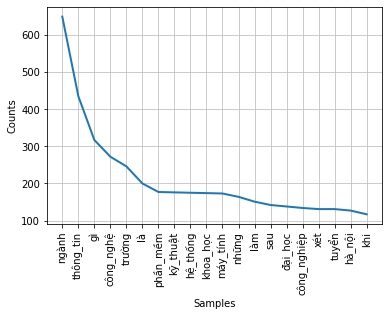

In [9]:
#chung ta se loai bo stop word trong van ban


#bay h dau tien minh muon biet cac stop word o dau va cho nao

#tokens = [t for t in text.split()]
tokens = []

for i in range(0,X.count()):
  for j in X[i].split():
    tokens.append(j)

freq = nltk.FreqDist(tokens)
freq.plot(20, cumulative=False)

In [10]:
#nhu vay chung ta biet mot so tu xuat hien xuat hien thuong xuyen va no se anh huong toi mo hinh can du doan
#chung ta se loai bo chung de cho model co do chinh xac cao hon

stopword = ["nghành","gì","là","trường","mày","bot"]
 
def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stopword:
            words.append(word)
    return ' '.join(words)

print(X[4])
demo = remove_stopwords(X[4])
demo

ngày_mai gặp lại nhé bot


'ngày_mai gặp lại nhé'

In [11]:
for i in range(0,X.count()):
  X[i]= remove_stopwords(X[i])

In [12]:
#buoc tiep theo chung ta se xay dung bo tu dien cho may hoc
vectorizer = CountVectorizer()

def transform(data):
  data= list(data)
  return vectorizer.fit_transform(data).todense()

data1 = transform(X)

In [13]:
print(data1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
#chia du lieu ra lam 2 phan
X_train, X_test, Y_train, Y_test = train_test_split(data1, label, test_size=0.1, random_state=0)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[ 1 58 42 47 47 58 29 25 20 37 28 58 38 50 21  7  1 51 18 39 47 28 50 26
 43 49 26 37 24 45 23 50 49 58 50 36 46 38  9 46 11 47 27 22 40 29 26 53
  1 12 11 49 41 22  7 21 38  1 22 16 28 27 21 19 28 42  7 50 47 14 38 27
 34 28 41 11 11 25 18 23 50 40 40 53 47  6 40 16 40  8 36 19 45 42 25  1
 18 38 44 55 27 46 33 31 47 31 57 18 56 28 48 37  7 11  7 47 52 28 52 56
 42 41 25 15 27 49 33 13 16 28 39 15 22 53 58 26 43 27 41 10 50  1 50 14
 43 34 42 51 39 49 58  1 25 51 43 14 49 12 50 28 24 29 44 26 20 50 49  0
 15 50 27 39  9 16 47 11 52 22 50 52 31 13  1 26 31 50 24 25 10 38 28 27
 37 24 47 47  1 50 27 50 37 39 46 12 56 29 25 13 49 46 49 20 52 23 24 36
 53 51 28 50 38 41 41 19 37 42 47 50 25 27 11 27  1 14  7 50 29 19 39  7
 13 41 52 26 41 50 50 29 50 23

In [15]:
X_test.shape

(108, 468)

In [16]:
#khoi tao mo hinh
#chung ta se dung loai mo hinh multinomial Naive Bayes de phan loai

clf= MultinomialNB()
scores = cross_val_score(clf, X_train, Y_train, cv=5)
print("%0.2f  accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


82.59  accuracy with a standard deviation of 0.02


In [17]:
#dua du lieu vao cho model hoc
clf.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
#kiem tra voi du lieu testing xem do chinh xac cua no la bao nhieu

prediction = clf.predict(X_test)
print("Độ chính xác so với dữ liệu dự đoán và dữ liệu test là: ")
accuracy_score(Y_test, prediction)

Độ chính xác so với dữ liệu dự đoán và dữ liệu test là: 


0.8148148148148148

In [20]:
#bay h se luu file tu vung lai de dung cho sau nay

pickle.dump(vectorizer.vocabulary_, open('vocab.pkl', 'wb')) #luu lai
pickle.dump(clf, open('NB_ChatBot_model.pkl', 'wb')) #luu model lai
#luu cach ma hoa cua nhan lai
pickle.dump(le, open('decode_label.pkl', 'wb'))